In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import plotly.express as px

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1Ri3yvaslh5ShGBVSZFpuOAEo_Uu4T9BS", encoding='cp1251')
df.head()

,OrderID,OrderDate,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,Profit,Quantity,...,SupplierCountry,EmployeeName,Hire Date,Title,Year Salary,GrossProfitMargin,ABC_XYZ,RFM,RFM Segment,Churn
0,10248,2012-10-01,4,2,2,11,343.44,284.37,59.07,12,...,Spain,Elvis Presley,1993-09-14,President,80000,17.199511,BZ,312,New,No
1,10248,2012-10-01,4,2,2,42,140.40,116.25,24.15,10,...,Singapore,Elvis Presley,1993-09-14,President,80000,17.200855,BZ,312,New,No
2,10248,2012-10-01,4,2,2,72,63.55,52.62,10.93,5,...,Italy,Elvis Presley,1993-09-14,President,80000,17.199056,CZ,312,New,No
3,10249,2011-10-01,79,7,2,14,205.20,169.91,35.29,9,...,Japan,Tom Lindwall,1995-11-22,Sales Representative,61000,17.197856,BZ,333,Loyal,No
4,10249,2011-10-01,79,7,2,51,4048.00,3642.67,405.33,40,...,Australia,Tom Lindwall,1995-11-22,Sales Representative,61000,10.013093,AZ,333,Loyal,No


In [ ]:
df['OrderDate'] = df['OrderDate'].astype({'OrderDate': 'datetime64'})

In [ ]:
df1=df[['OrderDate','Sales']]
df1

,OrderDate,Sales
0,2012-10-01,343.44
1,2012-10-01,140.40
2,2012-10-01,63.55
3,2011-10-01,205.20
4,2011-10-01,4048.00
...,...,...
2167,2012-02-16,31.50
2168,2012-02-16,156.50
2169,2012-02-16,127.50
2170,2012-02-16,308.69


In [ ]:
df1=df1.groupby(by='OrderDate').sum()
#.reset_index()
df1

,Sales
OrderDate,
2009-07-21,1734.95
2009-08-19,723.95
2009-09-02,1046.85
2009-09-16,752.06
2009-09-18,1817.20
...,...
2013-03-23,2953.78
2013-03-26,4545.50
2013-03-27,587.14


In [ ]:
df1=df1.asfreq('1D', fill_value=0)
df1

,Sales
OrderDate,
2009-07-21,1734.95
2009-07-22,0.00
2009-07-23,0.00
2009-07-24,0.00
2009-07-25,0.00
...,...
2013-03-25,0.00
2013-03-26,4545.50
2013-03-27,587.14


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  542 non-null    datetime64[ns]
 1   Sales      542 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


<AxesSubplot:xlabel='OrderDate'>

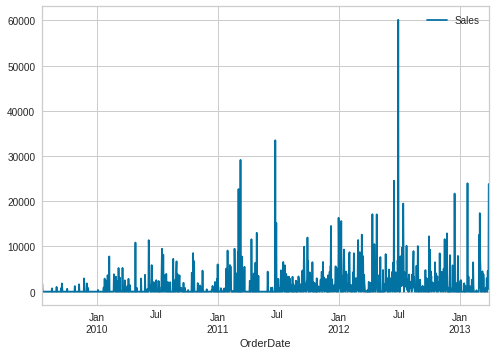

In [ ]:
df1.plot()

In [ ]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.time_series import *
setup(df1, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 6c3f
INFO:logs:self.variable_keys: {'fh', 'log_plots_param', 'X_train', 'logging_param', 'fold_generator', 'X_test_transformed', 'strictly_positive', '_available_plots', '_all_models', 'y_test', 'approach_type', 'exp_id', 'y_train', 'index_type', '_ml_usecase', 'X_transformed', 'USI', 'all_sp_values', 'html_param', 'X', 'primary_sp_to_use', 'data', '_gpu_n_jobs_param', 'seasonal_period', 'y_test_transformed', 'variable_keys', 'y_train_transformed', 'seed', 'X_train_transformed', 'gpu_param', 'y', 'y_transformed', 'seasonality_present', 'enforce_pi', 'exp_name_log', '_all_models_internal', 'experiment__', 'X_test', 'fold_groups_param_full', 'display_container', 'idx', 'n_jobs_param', 'master_model_container', '_all_metrics', 'fold_param', 'enforce_exogenous', 'memory', 'exogenous_present',

,Description,Value
0,session_id,123
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1348, 1)"
5,Train data shape,"(1341, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 2.79s...............


In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,1348.0
1,Summary,Statistics,Actual,Mean,,1322.81003
2,Summary,Statistics,Actual,Median,,0.0
3,Summary,Statistics,Actual,Standard Deviation,,3409.643594
4,Summary,Statistics,Actual,Variance,,11625669.438471
5,Summary,Statistics,Actual,Kurtosis,,82.798882
6,Summary,Statistics,Actual,Skewness,,6.971382
7,Summary,Statistics,Actual,# Distinct Values,,543.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",128.930494
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",209.441248


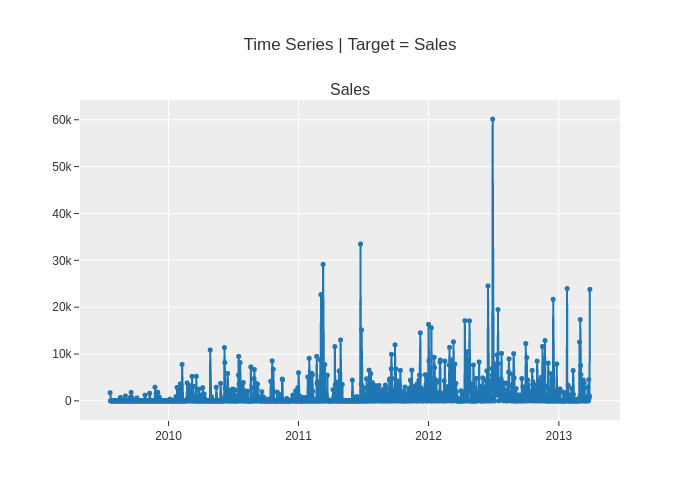

INFO:logs:Visual Rendered Successfully


In [ ]:
from pandas_profiling import plot
plot_model(plot='ts')

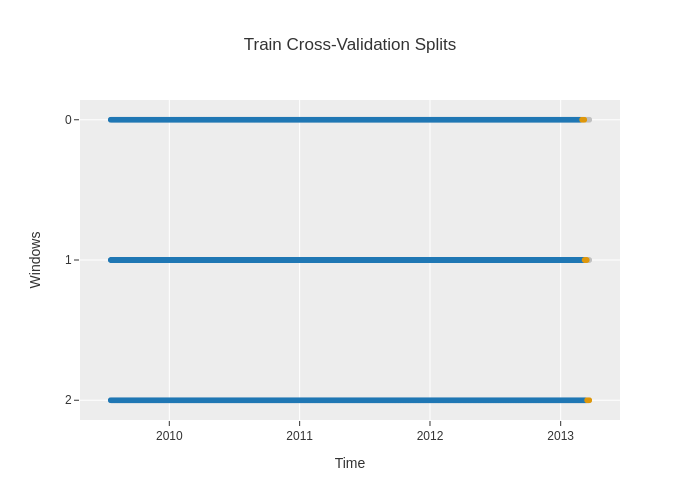

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'cv')

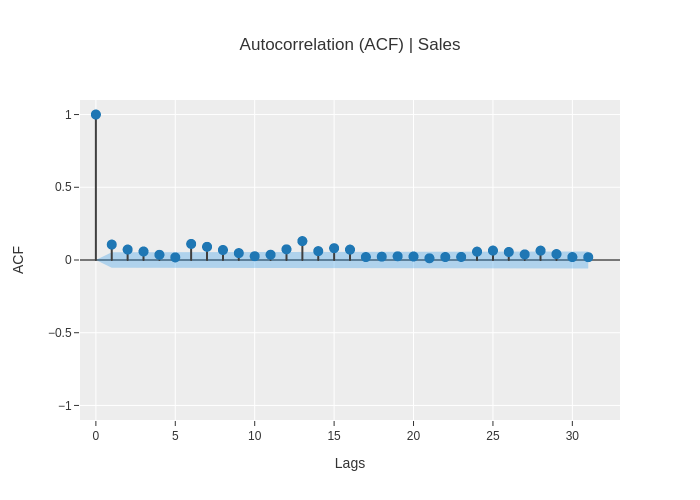

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'acf')

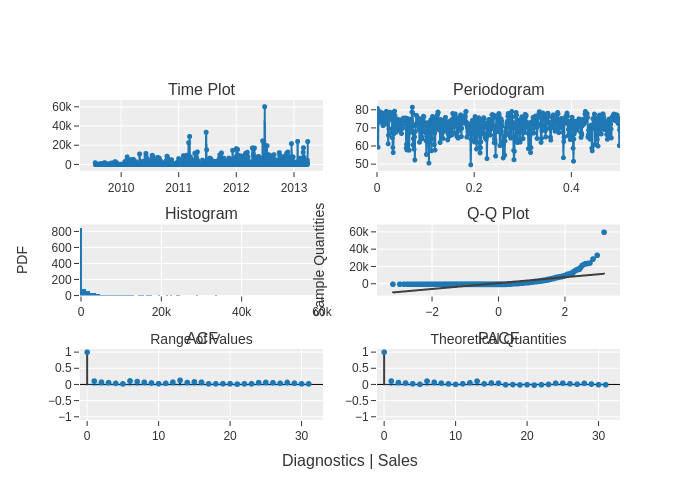

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'diagnostics')

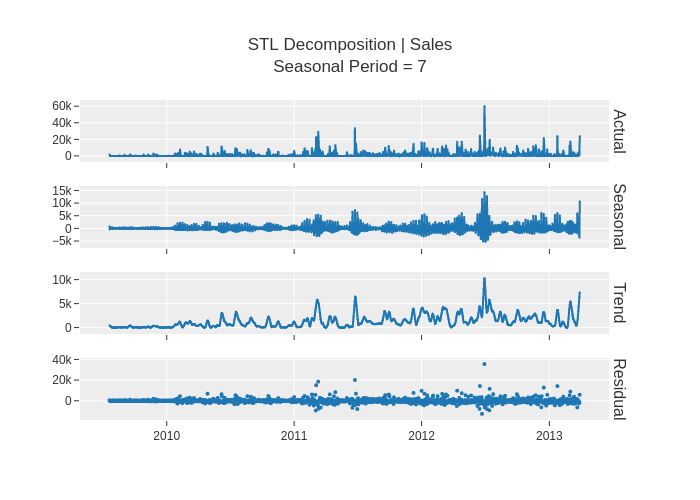

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'decomp_stl')

In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,2818.5688,3521.0381,4902654442735320064.0,1.3209,1.4911,0.7806,-13.1254,0.3233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,2818.5688,3521.0382,4902654551260889088.0,1.3209,1.4911,0.7806,-13.1254,0.3233
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,2818.5688,3521.0381,4902654442733995008.0,1.3209,1.4911,0.7806,-13.1254,0.2733
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,2818.5689,3521.0382,4902654654280737792.0,1.3209,1.4911,0.7806,-13.1254,0.3000
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,2818.5688,3521.0381,4902654442735319040.0,1.3209,1.4911,0.7806,-13.1254,0.2967
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,2818.8084,3516.4102,4899014642912252928.0,1.3218,1.4911,0.7795,-13.3829,0.3267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,2834.6656,3532.8589,4925734611173568512.0,1.3244,1.4996,0.7832,-13.2367,0.2633
polytrend,Polynomial Trend Forecaster,2782.8121,3440.5539,4762600357553367040.0,1.3258,1.4718,0.7626,-13.9812,0.0533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,2876.1176,3549.3455,5054894623322717184.0,1.3297,1.5216,0.7868,-13.8117,0.3167
naive,Naive Forecaster,2312.3138,3334.3918,608674357066629248.0,1.331,1.2266,0.7399,-0.8163,1.6100


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1), sp=7,
                    window_length=7)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
 lr_cds_dt = create_model('lr_cds_dt')
print(lr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2013-03-01,4740.1051,6601.7483,5.057068e+18,1.4166,2.5238,1.4678,-0.2911
1,2013-03-08,1606.4287,1807.6373,3.563930e+18,0.9199,0.8460,0.3994,-0.1532
2,2013-03-15,2109.1725,2153.7288,6.086966e+18,1.6262,1.1034,0.4745,-38.9317
Mean,NaT,2818.5688,3521.0381,4.902654e+18,1.3209,1.4911,0.7806,-13.1254
SD,NaT,1374.1456,2182.9683,1.035796e+18,0.2962,0.7377,0.4869,18.2479


INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1), sp=7,
                    window_length=7)
INFO:logs:create_model() successfully completed......................................


BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1), sp=7,
                    window_length=7)


In [ ]:
tuned_lr_cds_dt = tune_model(lr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2013-03-01,4886.7943,6746.3106,5.179307e+18,1.4535,2.6019,1.4999,-0.3483
1,2013-03-08,1498.0421,1723.9954,3.447158e+18,0.8940,0.7889,0.3810,-0.0490
2,2013-03-15,2046.9938,2126.5036,6.083676e+18,1.6009,1.0709,0.4685,-37.9286
Mean,NaT,2810.6100,3532.2699,4.903380e+18,1.3162,1.4872,0.7831,-12.7753
SD,NaT,1485.0910,2278.6029,1.093894e+18,0.3045,0.7965,0.5081,17.7865


INFO:logs:master_model_container: 31
INFO:logs:display_container: 4
INFO:logs:BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8)
INFO:logs:tune_model() succesfully completed......................................


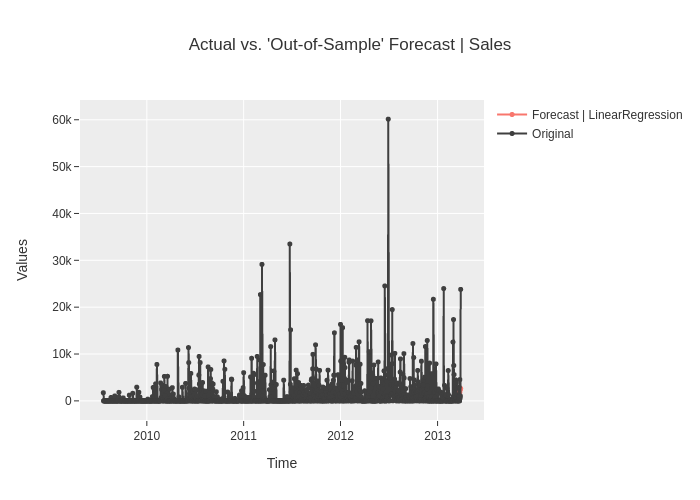

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(tuned_lr_cds_dt, plot = 'forecast')

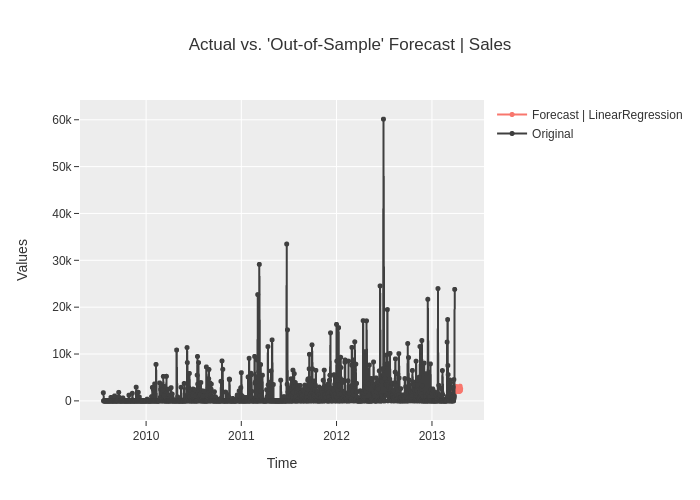

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(tuned_lr_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 30})

In [ ]:
final_best = finalize_model(tuned_lr_cds_dt)
# создание прогнозов
predict_model(final_best, fh = 90)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f1dd8b97950>, estimator=BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f1dd8b97950>, estimator=BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_li

,y_pred
2013-03-30,3422.6641
2013-03-31,2350.4491
2013-04-01,3418.8611
2013-04-02,1842.9842
2013-04-03,1975.2890
...,...
2013-06-23,2230.0509
2013-06-24,2941.8287
2013-06-25,2174.3917
2013-06-26,2932.8716


In [ ]:
save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8), model_name=my_best_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                    sp=14, window_length=8)
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1, normalize=True),
                     sp=14, window_length=8), 'my_best_model.pkl')